### 학습목표
- 데이터 인코딩 --> 레이블인코딩, 원-핫-인코딩
- 정규화, 표준화 --> 피쳐 스케일링
- 결측치 및 이상치 처리

### Label encoding : 문자열을 숫자형태로 변환
- 분류에서만 적용해야함
- fit()
- transform()

In [2]:
from sklearn.preprocessing import LabelEncoder

In [7]:
# label encoding
item_label = ['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder =LabelEncoder()
encoder.fit(item_label)
digit_label = encoder.transform(item_label)

print('encoder : ', encoder)
print('result : ', digit_label)

encoder :  LabelEncoder()
result :  [0 1 4 5 3 3 2 2]


In [6]:
# decoding
print('decoder result : ', encoder.inverse_transform(digit_label))

decoder result :  ['TV' '냉장고' '전자렌지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


### One-Hot encoding
- 피쳐값의 유형에 따라 새로운 피쳐를 추가해 고유 값에 해당하는 컬럼에만 1, 나머지는 0으로 표시
- 1차원의 정렬을 2차원의 매트릭스로 만듦

In [8]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [10]:
# label encoding --> One-Hot encoding
item_label = ['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder =LabelEncoder()
encoder.fit(item_label)
digit_label = encoder.transform(item_label)

print('type :', type(digit_label), digit_label)

type : <class 'numpy.ndarray'> [0 1 4 5 3 3 2 2]


In [12]:
# 2차원 데이터로 변환
digit_label = digit_label.reshape(-1, 1)
print(digit_label.shape, digit_label)

(8, 1) [[0]
 [1]
 [4]
 [5]
 [3]
 [3]
 [2]
 [2]]


In [16]:
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(digit_label)
one_hot_label = one_hot_encoder.transform(digit_label)

print(one_hot_label.shape)
print('result : ',one_hot_label.toarray())

(8, 6)
result :  [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


### Pandas의 get_dummies를 이용한 One-Hot encoding

In [18]:
import pandas as pd

labelDF = pd.DataFrame({
    'item' : ['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']
})

labelDF

,item
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [19]:
pd.get_dummies(labelDF)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 결측치 확인 및 결측치 시각화
- isnull()
- isna()

In [20]:
from io import StringIO

In [22]:
csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")
df = pd.read_csv(csv_data)
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [23]:
# 결측치 확인
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


In [25]:
df.isna().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

<AxesSubplot:>

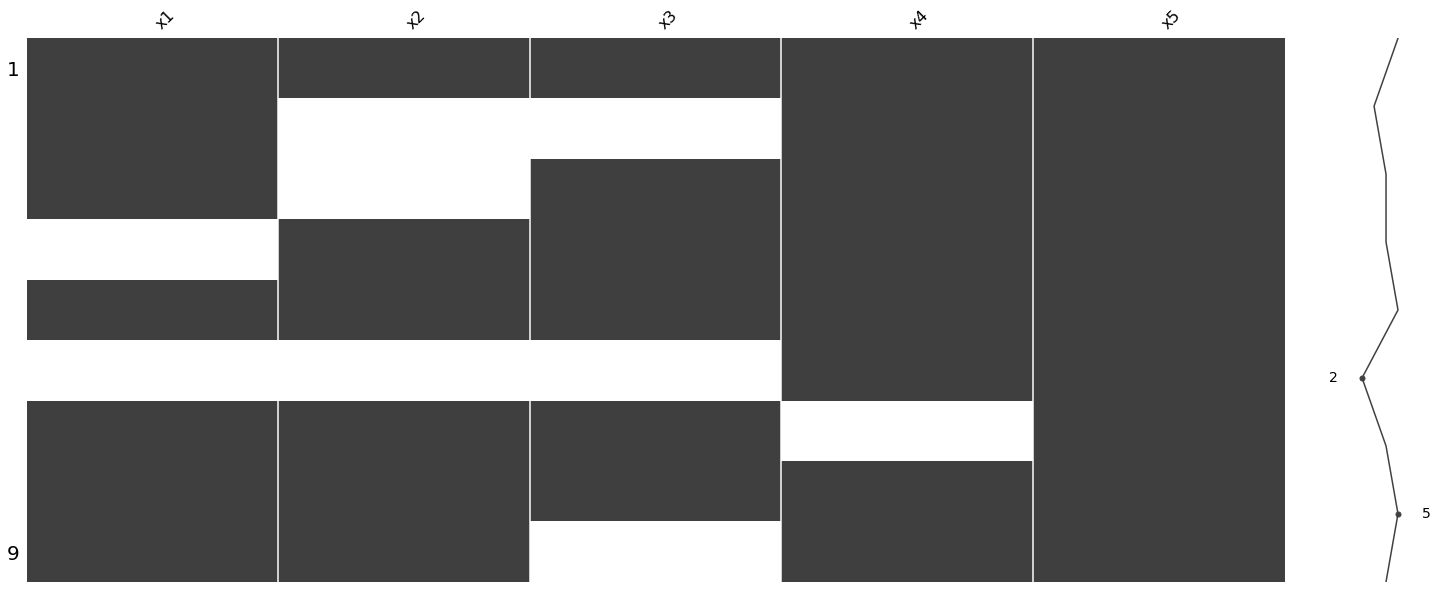

In [28]:
# 결측치 시각화 (결측치 : 흰색)
import missingno as msno

msno.matrix(df)

<AxesSubplot:>

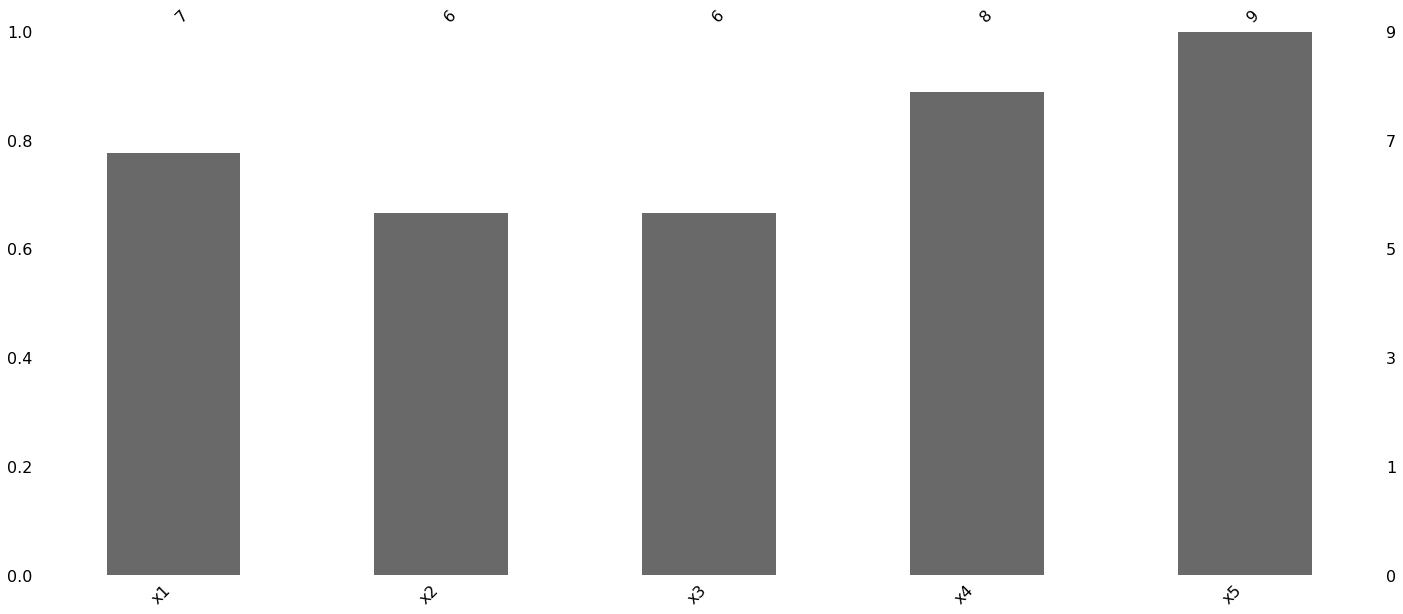

In [29]:
msno.bar(df)

In [30]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:>

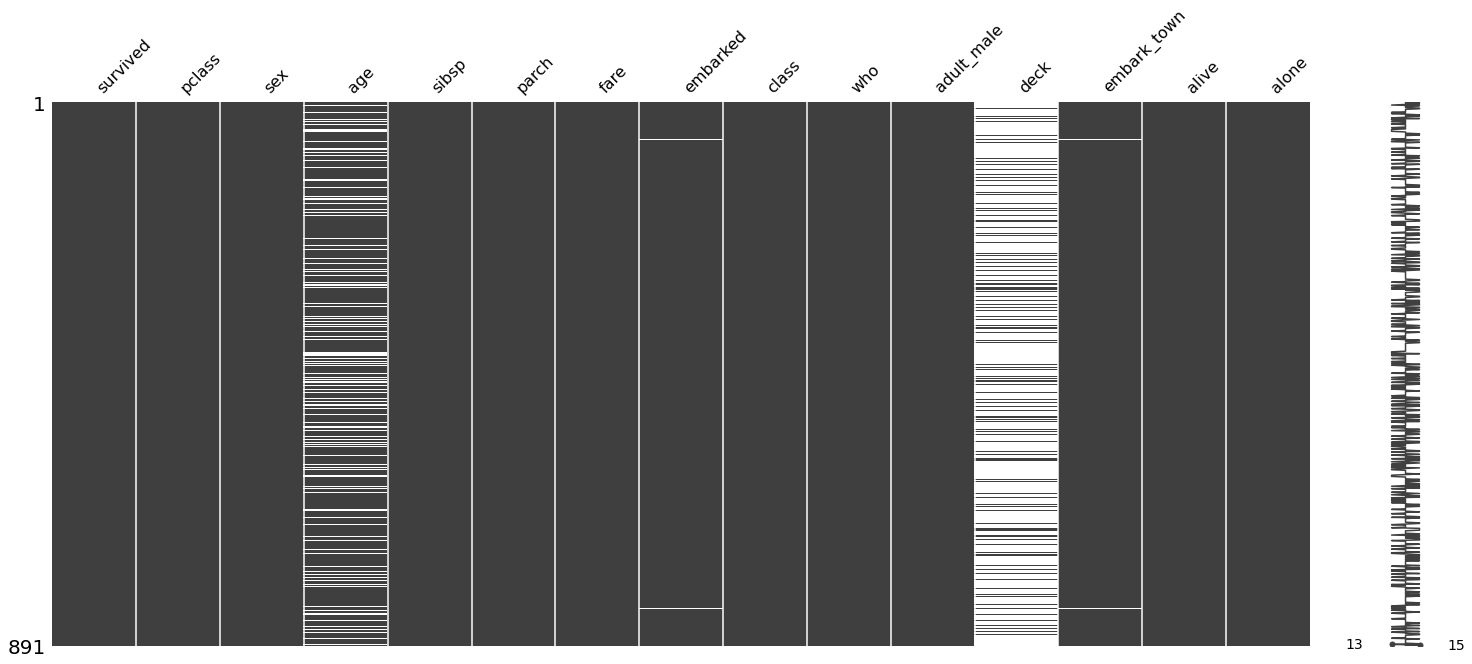

In [31]:
msno.matrix(titanic)

<AxesSubplot:>

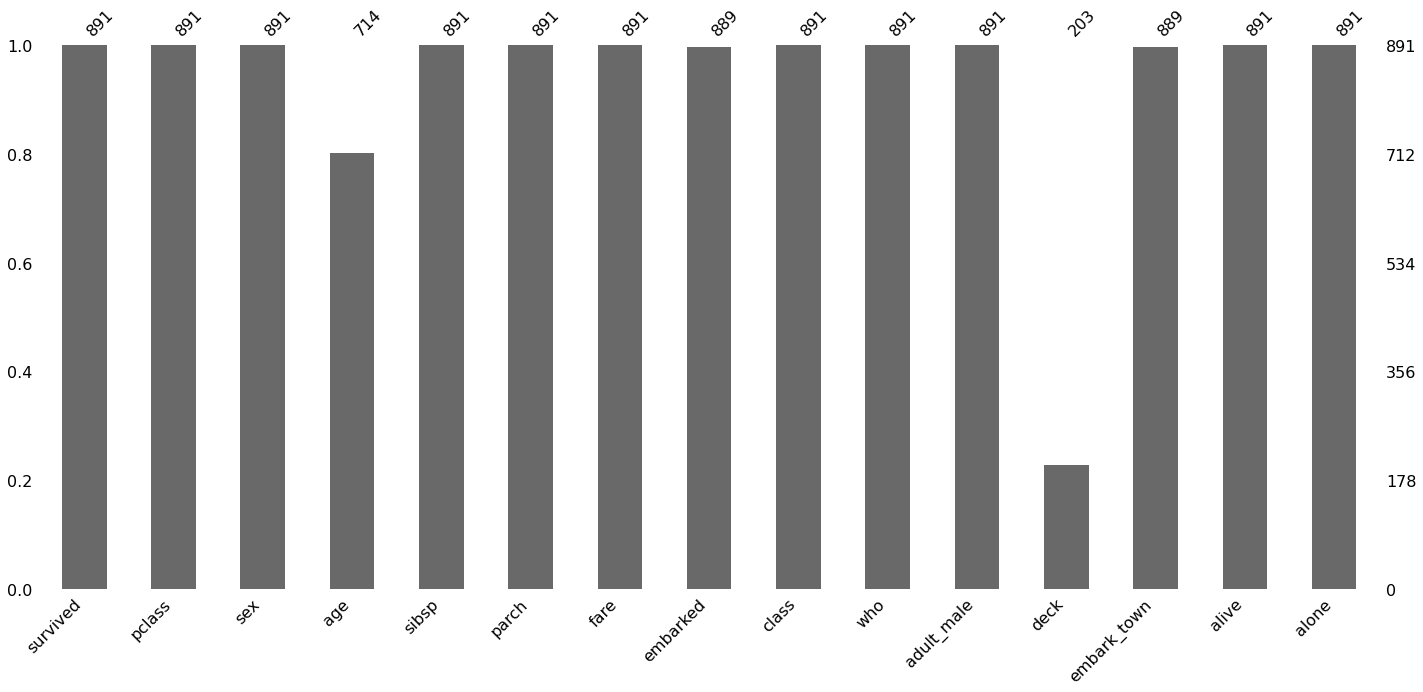

In [33]:
msno.bar(titanic)

### 결측치 처리
- dropna()

In [34]:
df.dropna()

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
4,5.0,0.5,5.0,2019-01-05,B
7,8.0,0.8,8.0,2019-01-08,B


In [35]:
df.dropna(axis=1)

,x5
0,A
1,B
2,C
3,A
4,B
5,C
6,A
7,B
8,C


In [36]:
# 비결측 데이터의 갯수가 맞는것만 남기고 삭제
df.dropna(thresh=7, axis=1)

,x1,x4,x5
0,1.0,2019-01-01,A
1,2.0,2019-01-02,B
2,3.0,2019-01-03,C
3,NaN,2019-01-04,A
4,5.0,2019-01-05,B
5,NaN,2019-01-06,C
6,7.0,NaN,A
7,8.0,2019-01-08,B
8,9.0,2019-01-09,C


In [41]:
# 타이타닉의 결측 데이터가 50%가 넘으면 삭제후 시각화
int(len(titanic)*0.5)

445

In [43]:
titanic.dropna(thresh = int(len(titanic)*0.5), axis = 1, inplace = True)

<AxesSubplot:>

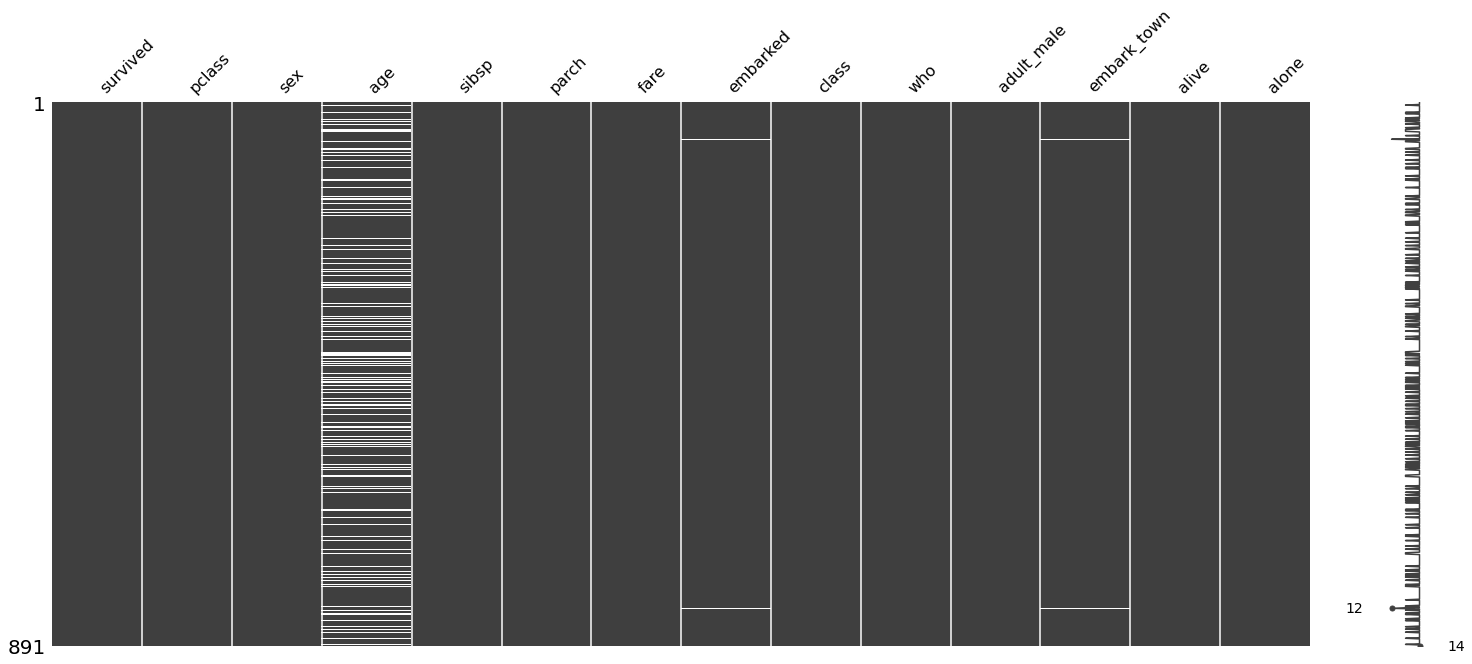

In [44]:
msno.matrix(titanic)

### Sklearn에서의 결측치
- SimpleImpute(평균값, 중앙값, 최빈값)
- mean, median, most_prequent

In [46]:
from sklearn.impute import SimpleImputer

In [47]:
# 결측치를 최빈값으로 변경
imputer = SimpleImputer(strategy = 'most_frequent')
df = pd.DataFrame(imputer.fit_transform(df),
                  columns = df.columns)

df

,x1,x2,x3,x4,x5
0,1,0.1,1,2019-01-01,A
1,2,0.1,1,2019-01-02,B
2,3,0.1,3,2019-01-03,C
3,1,0.4,4,2019-01-04,A
4,5,0.5,5,2019-01-05,B
5,1,0.1,1,2019-01-06,C
6,7,0.7,7,2019-01-01,A
7,8,0.8,8,2019-01-08,B
8,9,0.9,1,2019-01-09,C


In [50]:
# 타이타닉의 age컬럼의 결측값만 중앙값으로 대체
age_imputer = SimpleImputer(strategy = 'median')
titanic['age'] = age_imputer.fit_transform(titanic[['age']])

<AxesSubplot:>

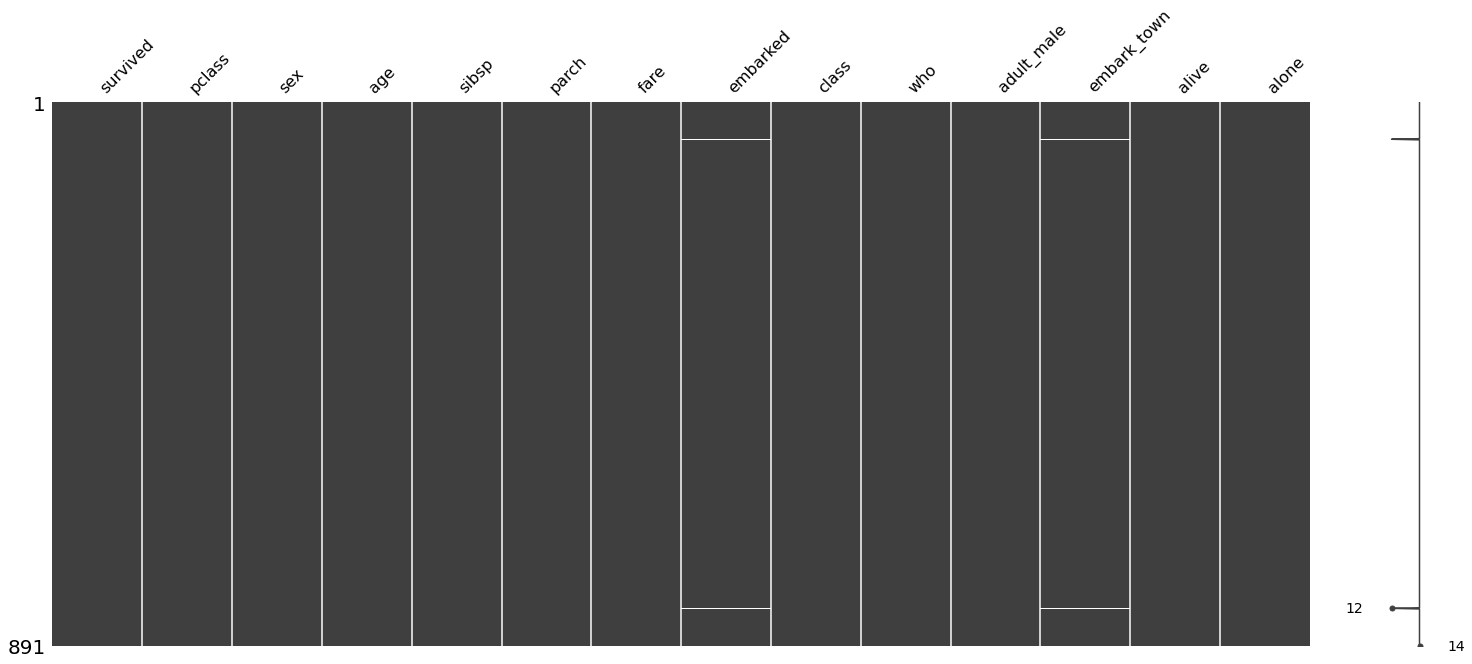

In [51]:
msno.matrix(titanic)

### Feature scailing
- StandardScaler()
- 표준화(Standardzation) : 정규분포 -> 평균이0, 분산이 1인 가우시안 분포
- 표준화 공식 : (X - X평균값) / (X표준편차)
- MinMaxScaler()
- 정규화(Normalization) : 모든피쳐를 0과 1사이의 값으로 변환(단, 음수가 있으면 1)
- 정규화 공식 : (X - X최소값) / (X최대값 - X최소값)

In [52]:
df = pd.DataFrame({'A':[14.00,90.20,90.95,96.27,91.21],
                   'B':[103.02,107.26,110.35,114.23,114.68], 
                   'C':['big','small','big','small','small']})
df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [55]:
# 공식을 이용한 df['A']의 정규화
df['A'] = (df['A'] - df['A'].min()) / (df['A'].max() - df['A'].min())

In [56]:
df

,A,B,C
0,0.000000,103.02,big
1,0.926219,107.26,small
2,0.935335,110.35,big
3,1.000000,114.23,small
4,0.938495,114.68,small


In [57]:
# 공식을 이용한 df['B']의 표준화
df['B'].mean(), df['B'].std()

(109.90799999999999, 4.901619120249964)

In [58]:
df['B'] = (df['B'] - df['B'].mean()) / (df['B'].std())

In [59]:
df

,A,B,C
0,0.000000,-1.405250,big
1,0.926219,-0.540230,small
2,0.935335,0.090174,big
3,1.000000,0.881749,small
4,0.938495,0.973556,small


### Iris 표준화 및 정규화
- StandardScaler()
- MinMaxScaler()

In [61]:
from sklearn.datasets import load_iris
import pandas as pd

In [64]:
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, 
                       columns = iris.feature_names)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [65]:
# 평균
iris_df.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [66]:
# 표준편차
iris_df.std()

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

In [67]:
# 분산
iris_df.var()

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

In [75]:
# 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
standard_iris = scaler.transform(iris_df)
standard_iris_df = pd.DataFrame(data = standard_iris,
                                columns = iris.feature_names)

standard_iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [76]:
# 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
standard_iris = scaler.transform(iris_df)
standard_iris_df = pd.DataFrame(data = standard_iris,
                                columns = iris.feature_names)

standard_iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


### Wine_data 표준화 및 정규화¶

In [78]:
df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )
df.columns = ['Class label', 'Alchol', 'Malic acid']

df

,Class label,Alchol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [91]:
# 표준화
scaler = StandardScaler()
standard_wine = scaler.fit_transform(df[['Alchol', 'Malic acid']])

standard_wine

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377],
       [ 1.48155459, -0.51736664],
       [ 1.71625494, -0.4186237 ],
       [ 1.3086175 , -0.16727801],
       [ 2.25977152, -0.62508622],
       [ 1.0615645 , -0.88540853],
       [ 1.3580281 , -0.15830138],
       [ 1.38273339, -0.76871232],
       [ 0.92568536, -0.54429654],
       [ 2.16095032, -0.54429654],
       [ 1.70390229, -0.4186237 ],
       [ 0.77745356, -0.47248348],
       [ 1.60508109, -0.37374054],
       [ 1.02450655, -0.68792264],
       [ 1.46920194, -0.66996938],
       [ 0.78980621,  0.68550197],
       [ 1.3086175 , -0.63406285],
       [-0.08723191,  1.31386618],
       [ 0.87627476, -0.42760033],
       [-0.18605311, -0.66099274],
       [ 0.61686912, -0.47248348],
       [ 0.06099988, -0.25704433],
       [ 0.48098997, -0.50839001],
       [ 0.36981612, -0.55327317],
       [ 1.07391715,

In [83]:
# 정규화
scaler = MinMaxScaler()
normal_wine = scaler.fit_transform(df[['Alchol', 'Malic acid']])

normal_wine

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ],
       [0.87894737, 0.23913043],
       [0.58157895, 0.36561265],
       [0.83421053, 0.20158103],
       [0.88421053, 0.22332016],
       [0.79736842, 0.27865613],
       [1.        , 0.17786561],
       [0.74473684, 0.12055336],
       [0.80789474, 0.28063241],
       [0.81315789, 0.14624506],
       [0.71578947, 0.19565217],
       [0.97894737, 0.19565217],
       [0.88157895, 0.22332016],
       [0.68421053, 0.21146245],
       [0.86052632, 0.23320158],
       [0.73684211, 0.16403162],
       [0.83157895, 0.16798419],
       [0.68684211, 0.46640316],
       [0.79736842, 0.17588933],
       [0.5       , 0.60474308],
       [0.70526316, 0.22134387],
       [0.47894737, 0.16996047],
       [0.65      , 0.21146245],
       [0.53157895, 0.25889328],
       [0.62105263, 0.20355731],
       [0.59736842, 0.19367589],
       [0.74736842, 0.22924901],
       [0.78684211, 0.18577075],
       [0.